In [1]:
import pandas as pd
import os

path = 'datos-salida'

# Obtengo una lista de todos los CSV en la carpeta
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Armo una lista vacia para guardar los dataframes individuales
dfs = []

# Leer caa archivo CSV y guardar en la lista
for file in csv_files:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all dataframes
df = pd.concat(dfs, ignore_index=True)

# Convierto la columna 'fecha_hora' a datetime
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'])

# Elimino los milisegundos de la columna 'fecha_hora'
df['fecha_hora'] = df['fecha_hora'].dt.floor('s')

# Elimino columnas x_cliente y y_cliente
df = df.drop(columns=['x_cliente', 'y_cliente'])

In [3]:
df.tail()

,fecha_hora,clientes_mostrador,clientes_totales,empleados_totales
1233265,2025-02-25 18:41:52,0,1,0
1233266,2025-02-25 18:41:52,0,1,0
1233267,2025-02-25 18:41:52,0,1,0
1233268,2025-02-25 18:41:52,0,1,0
1233269,2025-02-25 18:41:53,0,1,0


In [4]:
# Función para calcular la moda
def moda(series):
    return series.mode()[0] if not series.mode().empty else series.iloc[0]

# Aplicar la moda a cada grupo
resultado = df.groupby('fecha_hora', as_index=False).agg({
    'clientes_mostrador': moda,
    'clientes_totales': moda,
    'empleados_totales': moda
})

In [6]:
resultado.tail()

,fecha_hora,clientes_mostrador,clientes_totales,empleados_totales
123327,2025-02-25 18:41:49,0,1,0
123328,2025-02-25 18:41:50,0,1,0
123329,2025-02-25 18:41:51,0,1,0
123330,2025-02-25 18:41:52,0,1,0
123331,2025-02-25 18:41:53,0,1,0


In [7]:
# Calculo metricas de interes
print('Cantidad de filas:', resultado.shape[0])
print('Fecha y hora de la primera fila:', resultado['fecha_hora'].min())
print('Fecha y hora de la última fila:', resultado['fecha_hora'].max())
print('Cantidad de clientes en mostrador promedio:', resultado['clientes_mostrador'].mean())
print('Cantidad de clientes totales promedio:', resultado['clientes_totales'].mean())
print('Cantidad de empleados totales promedio:', resultado['empleados_totales'].mean())



Cantidad de filas: 123332
Fecha y hora de la primera fila: 2025-02-20 18:38:15
Fecha y hora de la última fila: 2025-02-25 18:41:53
Cantidad de clientes en mostrador promedio: 0.1579152207050887
Cantidad de clientes totales promedio: 0.5368760743359388
Cantidad de empleados totales promedio: 0.4127233807933059


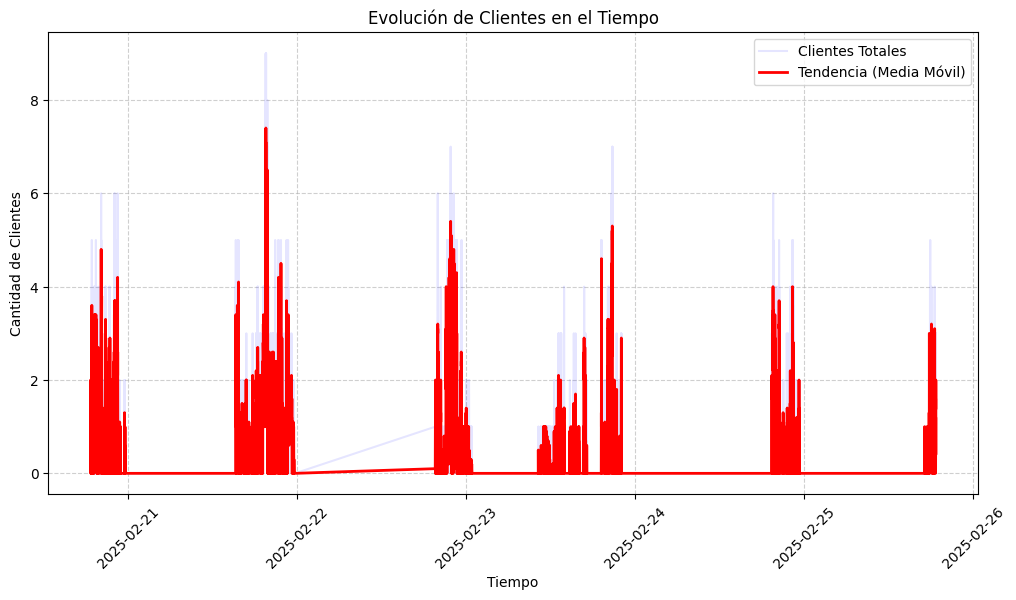

In [8]:
import matplotlib.pyplot as plt

# Aplicar media móvil para suavizar los datos
resultado['clientes_totales_suavizados'] = resultado['clientes_totales'].rolling(window=10, min_periods=1).mean()

# Graficar la evolución de clientes totales en el tiempo
plt.figure(figsize=(12, 6))
plt.plot(resultado['fecha_hora'], resultado['clientes_totales'], linestyle='-', color='b', markersize=4, alpha=0.1, label='Clientes Totales')
plt.plot(resultado['fecha_hora'], resultado['clientes_totales_suavizados'], linestyle='-', color='r', linewidth=2, label='Tendencia (Media Móvil)')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Clientes')
plt.title('Evolución de Clientes en el Tiempo')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 


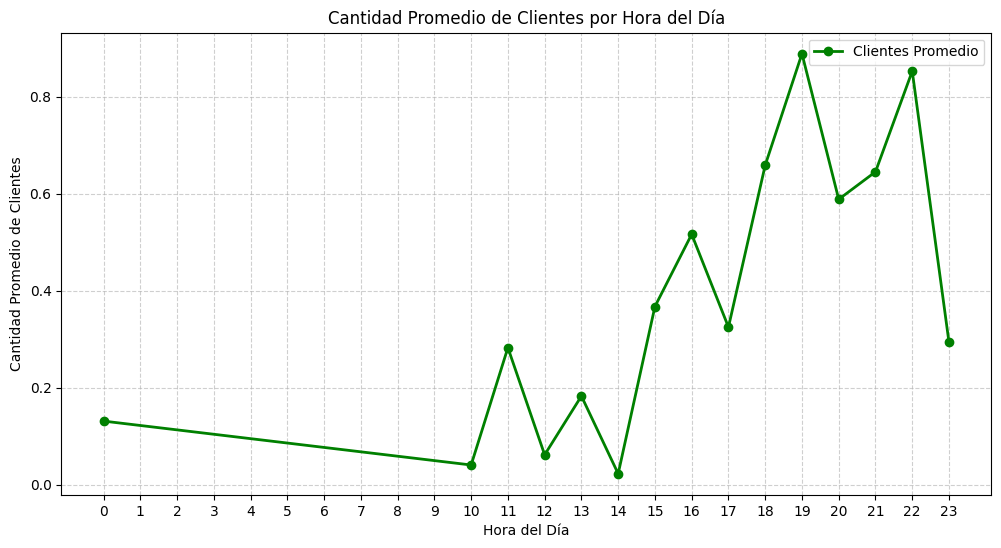

In [15]:
# Calcular la cantidad promedio de clientes por hora del día
resultado['hora'] = resultado['fecha_hora'].dt.hour
clientes_por_hora = resultado.groupby('hora')['clientes_totales'].mean()

# Graficar la cantidad promedio de clientes por hora del día
plt.figure(figsize=(12, 6))
plt.plot(clientes_por_hora.index, clientes_por_hora.values, marker='o', linestyle='-', color='g', linewidth=2, markersize=6, label='Clientes Promedio')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad Promedio de Clientes')
plt.title('Cantidad Promedio de Clientes por Hora del Día')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
